# Capítulo 4: Descomposiciones de Matrices

En este notebook exploraremos las descomposiciones matriciales implementadas en C++ y su aplicación en la Reducción de Dimensionalidad (PCA).

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Añadir ruta de build
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../build')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../build/Release')))

import mathml_cpp

## 1. Autovalores y Autovectores
Calcularemos los autovalores y autovectores de una matriz simétrica.

In [2]:
A = np.array([[4.0, 1.0], [1.0, 3.0]])
print("Matriz A:\n", A)

eigenvalues = mathml_cpp.matrix_decompositions.get_eigenvalues(A)
eigenvectors = mathml_cpp.matrix_decompositions.get_eigenvectors(A)

print("\nAutovalores:\n", eigenvalues)
print("\nAutovectores:\n", eigenvectors)

Matriz A:
 [[4. 1.]
 [1. 3.]]

Autovalores:
 [4.61803399+0.j 2.38196601+0.j]

Autovectores:
 [[ 0.85065081+0.j -0.52573111+0.j]
 [ 0.52573111+0.j  0.85065081+0.j]]


## 2. PCA: Análisis de Componentes Principales
Generaremos datos sintéticos 2D correlacionados y usaremos nuestra implementación de PCA para proyectarlos.

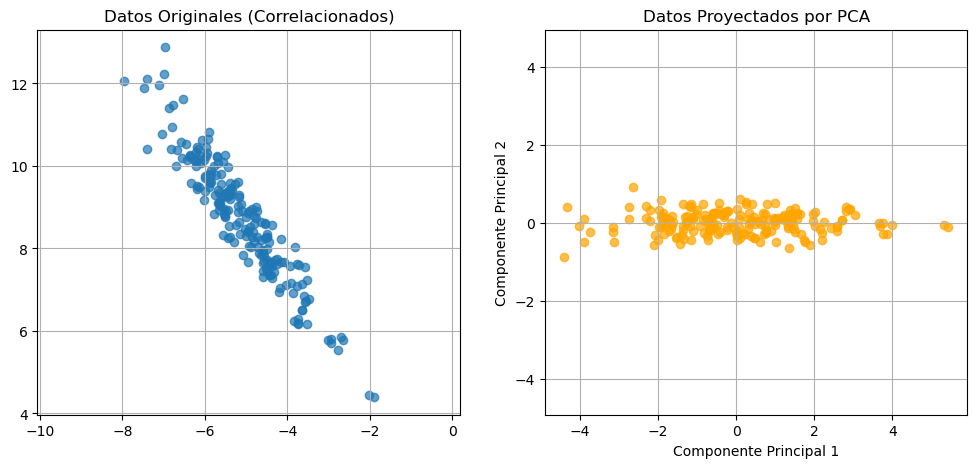

In [ ]:
# Generar datos
X, _ = make_blobs(n_samples=200, centers=1, random_state=42, cluster_std=1.5)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

# Aplicar PCA (Reducir a 2 componentes para visualizar la rotacion, o 1 para proyectar)
# La implementacion de PCA retorna los datos proyectados sobre los k componentes principales.
X_pca = mathml_cpp.matrix_decompositions.pca(X_aniso, 2)

# Visualizacion
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], alpha=0.7)
plt.title("Datos Originales (Correlacionados)")
plt.axis('equal')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, color='orange')
plt.title("Datos Proyectados por PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.axis('equal')
plt.grid(True)

plt.show()

**Interpretación:** La gráfica de la derecha muestra los datos rotados alineados con los ejes principales, lo que indica que PCA ha de-correlacionado las variables.